In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size': 12})

1500


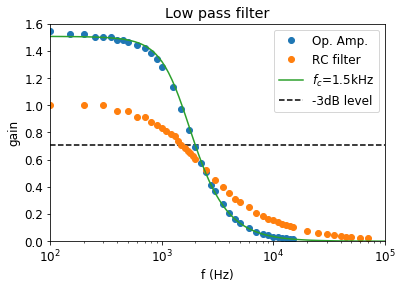

In [48]:
freq_op = []
gain_op = []
freq_rc = []
gain_rc = []

with open('ga-opamp.tsv', 'r') as f:
    while True:
        try:
            a, _, _, d = map(float, f.readline().split())
            freq_op.append(a)
            gain_op.append(d)
        except:
            break

with open('ga-rc.tsv', 'r') as f:
    while True:
        try:
            a, _, c = map(float, f.readline().split())
            freq_rc.append(a)
            gain_rc.append(c)
        except:
            break
            
plt.title('Low pass filter')

plt.plot(freq_op, gain_op, 'o', label='Op. Amp.')
plt.plot(freq_rc, gain_rc, 'o', label='RC filter')

plt.xscale('log')
plt.xlabel('f (Hz)')
plt.ylabel('gain')

plt.xlim(10**2, 10**5)
plt.ylim(0, 1.6)

plt.hlines(10**(-3/20), 10**2, 10**5, label='-3dB level', linestyles='dashed')

a = 5.1 / 10.05
r = 10.05e3
c = 1.07e-8
b = 1 / (a+1)
# fc = 1/(2*math.pi*r*c)
fc = 1500
print(fc)

f = np.logspace(2, 5, 100)
gaininvsq = (b - b * (f/fc)**2)**2 + ((3*b-1)*(f/fc))**2
gain = 1 / gaininvsq ** 0.5
plt.plot(f, gain, label=r'$f_c$=1.5kHz')

plt.legend(loc=0)
plt.savefig('ga.pdf')

1400


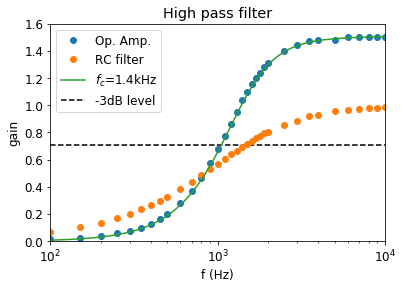

In [53]:
freq_op = []
gain_op = []
freq_rc = []
gain_rc = []

with open('na-opamp.tsv', 'r') as f:
    while True:
        try:
            a, _, _, d = map(float, f.readline().split())
            freq_op.append(a)
            gain_op.append(d)
        except:
            break

with open('na-rc.tsv', 'r') as f:
    while True:
        try:
            a, _, c = map(float, f.readline().split())
            freq_rc.append(a)
            gain_rc.append(c)
        except:
            break
            
plt.title('High pass filter')
plt.plot(freq_op, gain_op, 'o', label='Op. Amp.')
plt.plot(freq_rc, gain_rc, 'o', label='RC filter')

plt.xscale('log')
plt.xlabel('f (Hz)')
plt.ylabel('gain')

plt.xlim(10**2, 10**4)
plt.ylim(0, 1.6)
plt.hlines(10**(-3/20), 10**2, 10**5, label='-3dB level', linestyles='dashed')

a = 5.1 / 10.05
r = 10.05e3
c = 7.5e-9
b = 1 / (a+1)
# fc = 1/(2*math.pi*r*c) * math.sqrt(1/2)
fc = 1400
print(fc)

f = np.logspace(2, 5, 100)
x = f/fc
gain = x**2 / np.sqrt(((b*x**2 - b)**2 + ((3*b-1)*x)**2))
plt.plot(f, gain, label=r'$f_c$=1.4kHz')

plt.legend(loc=0)
plt.savefig('na.pdf')